In [158]:
import gzip
import pandas as pd
import matplotlib.pyplot as plt

## Access the GZ files

In [159]:
with gzip.open('downloads/mimic-iv-2.2/mimic-iv-2.2/hosp/admissions.csv.gz') as admissions:

    admissions_db = pd.read_csv(admissions)

admissions_db.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10000032,22595853,2180-05-06 22:23:00,2180-05-07 17:15:00,NaN,URGENT,P874LG,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,2180-05-06 19:17:00,2180-05-06 23:30:00,0
1,10000032,22841357,2180-06-26 18:27:00,2180-06-27 18:49:00,NaN,EW EMER.,P09Q6Y,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-06-26 15:54:00,2180-06-26 21:31:00,0
2,10000032,25742920,2180-08-05 23:44:00,2180-08-07 17:50:00,NaN,EW EMER.,P60CC5,EMERGENCY ROOM,HOSPICE,Medicaid,ENGLISH,WIDOWED,WHITE,2180-08-05 20:58:00,2180-08-06 01:44:00,0
3,10000032,29079034,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME,Medicaid,ENGLISH,WIDOWED,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,0
4,10000068,25022803,2160-03-03 23:16:00,2160-03-04 06:26:00,NaN,EU OBSERVATION,P51VDL,EMERGENCY ROOM,NaN,Other,ENGLISH,SINGLE,WHITE,2160-03-03 21:55:00,2160-03-04 06:26:00,0


In [160]:
admissions_db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431231 entries, 0 to 431230
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   subject_id            431231 non-null  int64 
 1   hadm_id               431231 non-null  int64 
 2   admittime             431231 non-null  object
 3   dischtime             431231 non-null  object
 4   deathtime             8598 non-null    object
 5   admission_type        431231 non-null  object
 6   admit_provider_id     431227 non-null  object
 7   admission_location    431231 non-null  object
 8   discharge_location    312076 non-null  object
 9   insurance             431231 non-null  object
 10  language              431231 non-null  object
 11  marital_status        421998 non-null  object
 12  race                  431231 non-null  object
 13  edregtime             299282 non-null  object
 14  edouttime             299282 non-null  object
 15  hospital_expire_f

In [161]:
with gzip.open('downloads/mimic-iv-2.2/mimic-iv-2.2/hosp/diagnoses_icd.csv.gz') as diagnoses:

    dx_db = pd.read_csv(diagnoses)

dx_db.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10000032,22595853,1,5723,9
1,10000032,22595853,2,78959,9
2,10000032,22595853,3,5715,9
3,10000032,22595853,4,07070,9
4,10000032,22595853,5,496,9


In [162]:
with gzip.open('downloads/mimic-iv-2.2/mimic-iv-2.2/hosp/d_icd_diagnoses.csv.gz') as d_diagnoses:

    d_dx_db = pd.read_csv(d_diagnoses)

d_dx_db.head()

,icd_code,icd_version,long_title
0,0010,9,Cholera due to vibrio cholerae
1,0011,9,Cholera due to vibrio cholerae el tor
2,0019,9,"Cholera, unspecified"
3,0020,9,Typhoid fever
4,0021,9,Paratyphoid fever A


# Table Joins

In [163]:
d_dx_db['icd_code'].value_counts()

V419      2
E8889     2
E8841     2
E8842     2
V706      2
         ..
M89439    1
M89432    1
M89431    1
M8943     1
Z9989     1
Name: icd_code, Length: 109282, dtype: int64

In [164]:
d_dx_db_deduplicated = d_dx_db.drop_duplicates(subset=['icd_code'])
d_dx_db_deduplicated.head()

,icd_code,icd_version,long_title
0,0010,9,Cholera due to vibrio cholerae
1,0011,9,Cholera due to vibrio cholerae el tor
2,0019,9,"Cholera, unspecified"
3,0020,9,Typhoid fever
4,0021,9,Paratyphoid fever A


# Data Exploration

## Admission Frequency

In [165]:
# Confirmed that there is only 1 admission ID in the admission Table
grouped = admissions_db[['hadm_id']].value_counts().to_frame(name='Frequency').reset_index()
grouped.describe()

,hadm_id,Frequency
count,4.312310e+05,431231.0
mean,2.500314e+07,1.0
std,2.888180e+06,0.0
min,2.000002e+07,1.0
25%,2.250155e+07,1.0
50%,2.500669e+07,1.0
75%,2.750470e+07,1.0
max,2.999993e+07,1.0


## Diagnosis Frequency

In [240]:
#Join the ICD-code to the diagnosis table to figure out what are the most common diagnosis
icd_frequency = diagnoses_db[['icd_code']].value_counts().to_frame(name='Fequency').reset_index()

icd_frequency_d = pd.merge(icd_frequency, d_dx_db_deduplicated, how='left', on='icd_code')
icd_frequency_d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25809 entries, 0 to 25808
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   icd_code     25809 non-null  object
 1   Fequency     25809 non-null  int64 
 2   icd_version  25809 non-null  int64 
 3   long_title   25809 non-null  object
dtypes: int64(2), object(2)
memory usage: 1008.2+ KB


In [239]:
# see the frequency of ICD-9 codes in the admission table as related to heart stuff
icd_4_filter = icd_frequency_d[icd_frequency_d['icd_code'].str.startswith(('39','41','42'))]
icd_4_filter.iloc[:50]

,icd_code,Fequency,icd_version,long_title
7,42731,35180,9,Atrial fibrillation
9,4280,34597,9,"Congestive heart failure, unspecified"
10,41401,34237,9,Coronary atherosclerosis of native coronary ar...
37,412,14343,9,Old myocardial infarction
49,41400,11571,9,Coronary atherosclerosis of unspecified type o...
77,42789,8864,9,Other specified cardiac dysrhythmias
87,42832,7876,9,Chronic diastolic heart failure
96,4168,7165,9,Other chronic pulmonary heart diseases
110,42822,6573,9,Chronic systolic heart failure
117,4241,6136,9,Aortic valve disorders


In [241]:
# Based on the rows of data, I do not think there is enough data specific to heart attacks
heart_attack_icd = ('4100', '4101', '4102', '4103', '4104', '4105', '4106', '4106', '4107', '4108', '4109')
icd_ha_filter = icd_frequency_d[icd_frequency_d['icd_code'].str.startswith(heart_attack_icd)]
icd_ha_filter

,icd_code,Fequency,icd_version,long_title
210,41071,4028,9,"Subendocardial infarction, initial episode of ..."
1084,41072,730,9,"Subendocardial infarction, subsequent episode ..."
1682,41041,396,9,Acute myocardial infarction of other inferior ...
1929,41011,328,9,Acute myocardial infarction of other anterior ...
2286,41091,245,9,Acute myocardial infarction of unspecified sit...
3132,41092,142,9,Acute myocardial infarction of unspecified sit...
3674,41001,109,9,Acute myocardial infarction of anterolateral w...
3805,41021,102,9,Acute myocardial infarction of inferolateral w...
4111,41031,89,9,Acute myocardial infarction of inferoposterior...
5485,41012,52,9,Acute myocardial infarction of other anterior ...


In [242]:
# I really like this ICD 4280 code. Unspecified Congestive Heart Failure. ~34k instances of the admission
cvd_unspecified_icd = ('4280')
icd_4280_filter = icd_frequency_d[icd_frequency_d['icd_code'].str.startswith(cvd_unspecified_icd)]
icd_4280_filter 

,icd_code,Fequency,icd_version,long_title
9,4280,34597,9,"Congestive heart failure, unspecified"


Text(0.5, 1.0, 'Frequency of Categories')

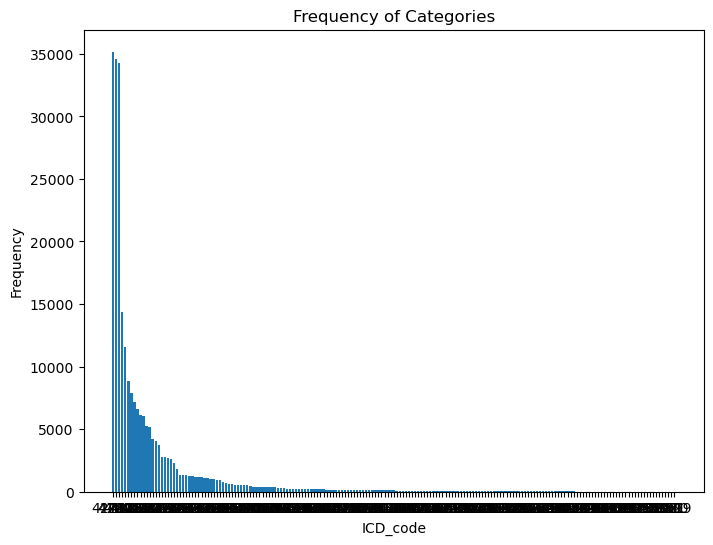

In [243]:
# Based on the below chart, there are 3 main diagnosis codes as related to the heart codes... I am happy with the 4280 code
# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(icd_4_filter['icd_code'], icd_4_filter['Fequency'])

# Add labels and title
plt.xlabel('ICD_code')
plt.ylabel('Frequency')
plt.title('Frequency of Categories')


## Congestive Heart Failure, Unspecified Exploration 

### Deeper Dive into the 4280 Admissions

In [244]:
#34,726 admissions with the code
chv_dx_db_trial = dx_db[dx_db['icd_code'].str.contains('4280')]
print(len(chv_dx_db_trial))


34726


In [249]:
#Filter for only in cases where ICD code = 4280
chv_dx_db = dx_db[dx_db['icd_code']=='4280']
cvd_filtered_admission = admissions_db.merge(chv_dx_db, on='hadm_id', how='inner')
# cvd_filtered_admission[['subject_id_x', 'hadm_id', 'admittime', 'dischtime', 'admission_location', 'icd_code']]
print(len(cvd_filtered_admission))
# cvd_filtered_admission.info()

34597


### Let's group patients based on those that have been readmitted, and figure out the time between readmissions

Note that the cvd_filtered_admission table only contains admissions with 4280 diagnosis

In [173]:
cvd_filtered_admission['admittime'] = pd.to_datetime(cvd_filtered_admission['admittime'])
cvd_filtered_admission['dischtime'] = pd.to_datetime(cvd_filtered_admission['dischtime'])

In [174]:
cvd_filtered_admission['admit_date'] = cvd_filtered_admission['admittime'].dt.date
cvd_filtered_admission

,subject_id_x,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,marital_status,race,edregtime,edouttime,hospital_expire_flag,subject_id_y,seq_num,icd_code,icd_version,admit_date
0,10000980,24947999,2190-11-06 20:57:00,2190-11-08 15:58:00,NaN,EW EMER.,P434W4,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,MARRIED,BLACK/AFRICAN AMERICAN,2190-11-06 15:30:00,2190-11-06 23:16:00,0,10000980,8,4280,9,2190-11-06
1,10000980,25242409,2191-04-03 18:48:00,2191-04-11 16:21:00,NaN,EW EMER.,P33K8A,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,...,MARRIED,BLACK/AFRICAN AMERICAN,2191-04-03 12:36:00,2191-04-03 20:29:00,0,10000980,8,4280,9,2191-04-03
2,10000980,26913865,2189-06-27 07:38:00,2189-07-03 03:00:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,MARRIED,BLACK/AFRICAN AMERICAN,2189-06-27 06:25:00,2189-06-27 08:42:00,0,10000980,6,4280,9,2189-06-27
3,10000980,29654838,2188-01-03 17:41:00,2188-01-05 17:30:00,NaN,EW EMER.,P20N5X,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,MARRIED,BLACK/AFRICAN AMERICAN,2188-01-03 12:23:00,2188-01-03 18:42:00,0,10000980,10,4280,9,2188-01-03
4,10001877,21320596,2150-11-21 23:02:00,2150-11-23 16:46:00,NaN,EU OBSERVATION,P42EMD,EMERGENCY ROOM,NaN,Other,...,MARRIED,WHITE,2150-11-21 17:42:00,2150-11-22 00:26:00,0,10001877,2,4280,9,2150-11-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34592,19998330,24492004,2178-10-01 07:28:00,2178-10-08 17:40:00,NaN,EW EMER.,P039RH,EMERGENCY ROOM,HOME HEALTH CARE,Other,...,MARRIED,BLACK/AFRICAN AMERICAN,2178-10-01 05:15:00,2178-10-01 08:51:00,0,19998330,6,4280,9,2178-10-01
34593,19998330,27282608,2177-07-25 04:34:00,2177-07-26 14:07:00,NaN,EW EMER.,P25U4M,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,MARRIED,BLACK/AFRICAN AMERICAN,2177-07-25 02:59:00,2177-07-25 06:56:00,0,19998330,3,4280,9,2177-07-25
34594,19998497,24819607,2139-09-09 13:01:00,2139-09-10 15:30:00,NaN,URGENT,P85Q3X,PROCEDURE SITE,HOME,Other,...,WIDOWED,WHITE,NaN,NaN,0,19998497,9,4280,9,2139-09-09
34595,19998591,23299044,2185-03-10 14:19:00,2185-03-11 14:10:00,NaN,EU OBSERVATION,P2743Q,EMERGENCY ROOM,NaN,Other,...,SINGLE,WHITE,2185-03-10 10:43:00,2185-03-10 16:46:00,0,19998591,11,4280,9,2185-03-10


In [245]:
# Script to grab a patients first two admits to the hospital
def first_two_admits(series):
    sorted_series = series.sort_values()
    return sorted_series.head(2).tolist()

In [246]:
# Cell was used to compare results focused on a specific patient
filtered_df = cvd_filtered_admission[cvd_filtered_admission['subject_id_x'] == 10000980]
filtered_df

,subject_id_x,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,marital_status,race,edregtime,edouttime,hospital_expire_flag,subject_id_y,seq_num,icd_code,icd_version,admit_date
0,10000980,24947999,2190-11-06 20:57:00,2190-11-08 15:58:00,NaN,EW EMER.,P434W4,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,MARRIED,BLACK/AFRICAN AMERICAN,2190-11-06 15:30:00,2190-11-06 23:16:00,0,10000980,8,4280,9,2190-11-06
1,10000980,25242409,2191-04-03 18:48:00,2191-04-11 16:21:00,NaN,EW EMER.,P33K8A,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,...,MARRIED,BLACK/AFRICAN AMERICAN,2191-04-03 12:36:00,2191-04-03 20:29:00,0,10000980,8,4280,9,2191-04-03
2,10000980,26913865,2189-06-27 07:38:00,2189-07-03 03:00:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,MARRIED,BLACK/AFRICAN AMERICAN,2189-06-27 06:25:00,2189-06-27 08:42:00,0,10000980,6,4280,9,2189-06-27
3,10000980,29654838,2188-01-03 17:41:00,2188-01-05 17:30:00,NaN,EW EMER.,P20N5X,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,MARRIED,BLACK/AFRICAN AMERICAN,2188-01-03 12:23:00,2188-01-03 18:42:00,0,10000980,10,4280,9,2188-01-03


In [213]:
# Convert 'admittime' to datetime
cvd_filtered_admission['admittime'] = pd.to_datetime(cvd_filtered_admission['admittime'])

# Sort the DataFrame by 'admittime' in ascending order within each 'subject_id_x' group
sorted_df = cvd_filtered_admission.sort_values(by=['subject_id_x', 'admittime'])

# Group by 'subject_id_x' and capture the first two 'admittime' values and corresponding 'hadm_id' values
first_adm_id= sorted_df.groupby('subject_id_x').head(1)
first_adm_id = first_adm_id[['subject_id_x', 'hadm_id']].rename(columns={'hadm_id': 'first_adm_id'})
first_adm_id

,subject_id_x,first_adm_id
3,10000980,29654838
4,10001877,21320596
5,10002013,21975601
9,10002155,23822395
11,10002428,23473524
...,...,...
34575,19997293,20208898
34583,19997367,23087270
34593,19998330,27282608
34594,19998497,24819607


In [216]:
result = cvd_filtered_admission.groupby('subject_id_x')['admittime'].agg(first_two_admits).reset_index()

# result_1 = cvd_filtered_admission.groupby('subject_id_x')['hadm_id'].agg(first_two_admits).reset_index()
# result_1[['First Admitted ID', 'Second Admitted ID']] = pd.DataFrame(result['hadm_id'].tolist(), index=result.index)


result[['First Admitted Time', 'Second Admitted Time']] = pd.DataFrame(result['admittime'].tolist(), index=result.index)
result.drop(columns=['admittime'], inplace=True)
result['Readmission Time'] = result['Second Admitted Time'] - result['First Admitted Time']

patient_first_adm_table = result.merge(first_adm_id, on='subject_id_x', how='left')
patient_first_adm_table.head()

# Add columns for 'First Admitted ID' and 'Second Admitted ID'

# sorted_result = result.sort_values(by='Readmission Time')
# sorted_result.head(5)

,subject_id_x,First Admitted Time,Second Admitted Time,Readmission Time,first_adm_id
0,10000980,2188-01-03 17:41:00,2189-06-27 07:38:00,540 days 13:57:00,29654838
1,10001877,2150-11-21 23:02:00,NaT,NaT,21320596
2,10002013,2159-12-14 23:55:00,2160-05-18 07:45:00,155 days 07:50:00,21975601
3,10002155,2129-08-04 12:44:00,2130-09-23 21:59:00,415 days 09:15:00,23822395
4,10002428,2156-05-11 14:49:00,NaT,NaT,23473524


The patient_first_adm_table captures the patients' first (and second) 4280 admissions and the admission ID of the first admission

In [251]:
# Define Readmission based on 90-day readmission status
patient_first_adm_table['Readmit Flag'] = 'No'
patient_first_adm_table.loc[patient_first_adm_table['Readmission Time'] < pd.Timedelta(days=90), 'Readmit Flag'] = 'Yes'

patient_first_adm_table.head(5)
# readmit_groups = result[['Readmit Flag']].value_counts()
# readmit_groups

,subject_id_x,First Admitted Time,Second Admitted Time,Readmission Time,first_adm_id,Readmit Flag
0,10000980,2188-01-03 17:41:00,2189-06-27 07:38:00,540 days 13:57:00,29654838,No
1,10001877,2150-11-21 23:02:00,NaT,NaT,21320596,No
2,10002013,2159-12-14 23:55:00,2160-05-18 07:45:00,155 days 07:50:00,21975601,No
3,10002155,2129-08-04 12:44:00,2130-09-23 21:59:00,415 days 09:15:00,23822395,No
4,10002428,2156-05-11 14:49:00,NaT,NaT,23473524,No


In [253]:
# Add the patient readmission column to the filtered admission table
cvd_filtered_admission_flag = cvd_filtered_admission.merge(patient_first_adm_table, on='subject_id_x', how='inner')
cvd_filtered_admission_flag.head()

# Note we probably will not need this table

,subject_id_x,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,hospital_expire_flag,subject_id_y,seq_num,icd_code,icd_version,First Admitted Time,Second Admitted Time,Readmission Time,first_adm_id,Readmit Flag
0,10000980,24947999,2190-11-06 20:57:00,2190-11-08 15:58:00,NaN,EW EMER.,P434W4,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,0,10000980,8,4280,9,2188-01-03 17:41:00,2189-06-27 07:38:00,540 days 13:57:00,29654838,No
1,10000980,25242409,2191-04-03 18:48:00,2191-04-11 16:21:00,NaN,EW EMER.,P33K8A,EMERGENCY ROOM,SKILLED NURSING FACILITY,Medicare,...,0,10000980,8,4280,9,2188-01-03 17:41:00,2189-06-27 07:38:00,540 days 13:57:00,29654838,No
2,10000980,26913865,2189-06-27 07:38:00,2189-07-03 03:00:00,NaN,EW EMER.,P30KEH,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,0,10000980,6,4280,9,2188-01-03 17:41:00,2189-06-27 07:38:00,540 days 13:57:00,29654838,No
3,10000980,29654838,2188-01-03 17:41:00,2188-01-05 17:30:00,NaN,EW EMER.,P20N5X,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,0,10000980,10,4280,9,2188-01-03 17:41:00,2189-06-27 07:38:00,540 days 13:57:00,29654838,No
4,10001877,21320596,2150-11-21 23:02:00,2150-11-23 16:46:00,NaN,EU OBSERVATION,P42EMD,EMERGENCY ROOM,NaN,Other,...,0,10001877,2,4280,9,2150-11-21 23:02:00,NaT,NaT,21320596,No


In [219]:
# Let's now filter for the first CVD admissions ! 
# Table is limited to a patient's first 4280 admission with a flag of their readmission status

first_admission_db = admissions_db.merge(patient_first_adm_table, left_on='hadm_id', right_on='first_adm_id',how='inner')
first_admission_db.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,race,edregtime,edouttime,hospital_expire_flag,subject_id_x,First Admitted Time,Second Admitted Time,Readmission Time,first_adm_id,Readmit Flag
0,10000980,29654838,2188-01-03 17:41:00,2188-01-05 17:30:00,NaN,EW EMER.,P20N5X,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,BLACK/AFRICAN AMERICAN,2188-01-03 12:23:00,2188-01-03 18:42:00,0,10000980,2188-01-03 17:41:00,2189-06-27 07:38:00,540 days 13:57:00,29654838,No
1,10001877,21320596,2150-11-21 23:02:00,2150-11-23 16:46:00,NaN,EU OBSERVATION,P42EMD,EMERGENCY ROOM,NaN,Other,...,WHITE,2150-11-21 17:42:00,2150-11-22 00:26:00,0,10001877,2150-11-21 23:02:00,NaT,NaT,21320596,No
2,10002013,21975601,2159-12-14 23:55:00,2159-12-17 14:04:00,NaN,EW EMER.,P96FGV,EMERGENCY ROOM,HOME,Medicare,...,WHITE,2159-12-14 21:53:00,2159-12-15 01:08:00,0,10002013,2159-12-14 23:55:00,2160-05-18 07:45:00,155 days 07:50:00,21975601,No
3,10002155,23822395,2129-08-04 12:44:00,2129-08-18 16:53:00,NaN,EW EMER.,P05HUO,PROCEDURE SITE,CHRONIC/LONG TERM ACUTE CARE,Other,...,WHITE,2129-08-04 11:00:00,2129-08-04 12:35:00,0,10002155,2129-08-04 12:44:00,2130-09-23 21:59:00,415 days 09:15:00,23822395,No
4,10002428,23473524,2156-05-11 14:49:00,2156-05-22 14:16:00,NaN,EW EMER.,P3529J,EMERGENCY ROOM,CHRONIC/LONG TERM ACUTE CARE,Medicare,...,WHITE,2156-05-11 11:29:00,2156-05-11 16:53:00,0,10002428,2156-05-11 14:49:00,NaT,NaT,23473524,No


#### Based on the results, there are a significant number of readmissions for Unspecified CHD !!

# Notes of Findings So Far

- There are 34,597 admissions with the ICD-9 4280 code of "Congestive Heart Failure, Unknown Reason"
- This comes from 14,432 patients, 8,166 of those patients were only admitted 1x for CHD
- Of those admitted multiple times, 3,068 were admitted within 90-days (2,557 60-days | 1,643 30-days)

I believe this gives me a strong enough sample size to use this as a predictive analytics model, where we want to predict whether a patient will be readmitted in 90-days for CHD again

# Let's combine other features into a master table

In [220]:
first_admission_db.head()

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,...,race,edregtime,edouttime,hospital_expire_flag,subject_id_x,First Admitted Time,Second Admitted Time,Readmission Time,first_adm_id,Readmit Flag
0,10000980,29654838,2188-01-03 17:41:00,2188-01-05 17:30:00,NaN,EW EMER.,P20N5X,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,...,BLACK/AFRICAN AMERICAN,2188-01-03 12:23:00,2188-01-03 18:42:00,0,10000980,2188-01-03 17:41:00,2189-06-27 07:38:00,540 days 13:57:00,29654838,No
1,10001877,21320596,2150-11-21 23:02:00,2150-11-23 16:46:00,NaN,EU OBSERVATION,P42EMD,EMERGENCY ROOM,NaN,Other,...,WHITE,2150-11-21 17:42:00,2150-11-22 00:26:00,0,10001877,2150-11-21 23:02:00,NaT,NaT,21320596,No
2,10002013,21975601,2159-12-14 23:55:00,2159-12-17 14:04:00,NaN,EW EMER.,P96FGV,EMERGENCY ROOM,HOME,Medicare,...,WHITE,2159-12-14 21:53:00,2159-12-15 01:08:00,0,10002013,2159-12-14 23:55:00,2160-05-18 07:45:00,155 days 07:50:00,21975601,No
3,10002155,23822395,2129-08-04 12:44:00,2129-08-18 16:53:00,NaN,EW EMER.,P05HUO,PROCEDURE SITE,CHRONIC/LONG TERM ACUTE CARE,Other,...,WHITE,2129-08-04 11:00:00,2129-08-04 12:35:00,0,10002155,2129-08-04 12:44:00,2130-09-23 21:59:00,415 days 09:15:00,23822395,No
4,10002428,23473524,2156-05-11 14:49:00,2156-05-22 14:16:00,NaN,EW EMER.,P3529J,EMERGENCY ROOM,CHRONIC/LONG TERM ACUTE CARE,Medicare,...,WHITE,2156-05-11 11:29:00,2156-05-11 16:53:00,0,10002428,2156-05-11 14:49:00,NaT,NaT,23473524,No


#### Prior_admit_history includes  the number of prior hospital admissions and the time of their most recent admission

In [259]:
# Calculate the number of prior patient admissions
# and the date of their most recent admission

# Let's add the first 4280 admission time to the master admissions table, so we can filter for only admissions prior to the 4280 admission
first_admit_time = first_admission_db[['subject_id', 'First Admitted Time']]
admissions_and_first_time = admissions_db.merge(first_admit_time, on='subject_id', how='inner', suffixes=('_df1', '_df2'))

# Convert 'admission_date' and 'discharge_date' to datetime
admissions_and_first_time['admittime'] = pd.to_datetime(admissions_and_first_time['admittime'])
admissions_and_first_time['dischtime'] = pd.to_datetime(admissions_and_first_time['dischtime'])
admissions_and_first_time['First Admitted Time'] = pd.to_datetime(admissions_and_first_time['First Admitted Time'])

admissions_and_first_time.head()

# Filter admission_db for rows where 'admission_date' is less than 'First Admitted Time'
prior_admissions_only = admissions_and_first_time[admissions_and_first_time['admittime'] < admissions_and_first_time['First Admitted Time']]

print(len(admissions_and_first_time))

prior_admissions_only['length_of_stay'] = prior_admissions_only['dischtime'] - prior_admissions_only['admittime']

prior_admissions_only = prior_admissions_only[['subject_id', 'hadm_id', 'admittime', 'dischtime', 'length_of_stay']]

# prior_admissions_only.head()

# Group the DataFrame by 'subject_id'
prior_admit_history = prior_admissions_only.groupby('subject_id').agg(
    num_prior_admissions=('subject_id', 'count'),
    prior_length_of_stay=('length_of_stay', 'sum')
).reset_index()

prior_admit_history.head()

69172


C:\Users\blake\AppData\Local\Temp\ipykernel_18812\3732218785.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prior_admissions_only['length_of_stay'] = prior_admissions_only['dischtime'] - prior_admissions_only['admittime']


,subject_id,num_prior_admissions,prior_length_of_stay
0,10001877,1,5 days 21:42:00
1,10002013,3,8 days 23:44:00
2,10002155,1,2 days 00:59:00
3,10002428,3,20 days 21:33:00
4,10003400,2,9 days 09:37:00


#### pts_db includes gender and age

In [123]:
with gzip.open('downloads/mimic-iv-2.2/mimic-iv-2.2/hosp/patients.csv.gz') as patients:

    pts_db = pd.read_csv(patients)

pts_db.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10000032,F,52,2180,2014 - 2016,2180-09-09
1,10000048,F,23,2126,2008 - 2010,NaN
2,10000068,F,19,2160,2008 - 2010,NaN
3,10000084,M,72,2160,2017 - 2019,2161-02-13
4,10000102,F,27,2136,2008 - 2010,NaN


#### Let's see what pharmacy information we can get from their first 4280 visit

In [260]:
with gzip.open('downloads/mimic-iv-2.2/mimic-iv-2.2/hosp/pharmacy.csv.gz') as pharmacy:

    pharm_db = pd.read_csv(pharmacy)

pharm_db.head()

C:\Users\blake\AppData\Local\Temp\ipykernel_18812\3259881085.py:3: DtypeWarning: Columns (16,18,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  pharm_db = pd.read_csv(pharmacy)


,subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime,medication,proc_type,status,entertime,...,basal_rate,one_hr_max,doses_per_24_hrs,duration,duration_interval,expiration_value,expiration_unit,expirationdate,dispensation,fill_quantity
0,10000032,22595853,11700683,10000032-34,2180-05-07 01:00:00,2180-05-07 22:00:00,Acetaminophen,Unit Dose,Discontinued via patient discharge,2180-05-07 00:09:24,...,NaN,NaN,NaN,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN
1,10000032,22595853,14779570,10000032-22,2180-05-07 00:00:00,2180-05-07 22:00:00,Sodium Chloride 0.9% Flush,Unit Dose,Discontinued via patient discharge,2180-05-07 00:00:54,...,NaN,NaN,3.0,NaN,Ongoing,36.0,Hours,NaN,Floor Stock Item,NaN
2,10000032,22595853,19796602,10000032-50,2180-05-08 08:00:00,2180-05-07 22:00:00,Furosemide,Unit Dose,Discontinued via patient discharge,2180-05-07 09:32:35,...,NaN,NaN,1.0,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN
3,10000032,22595853,20256254,10000032-32,2180-05-07 01:00:00,2180-05-07 22:00:00,Raltegravir,Unit Dose,Discontinued via patient discharge,2180-05-07 00:09:24,...,NaN,NaN,2.0,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN
4,10000032,22595853,28781051,10000032-27,2180-05-07 00:00:00,2180-05-07 22:00:00,Heparin,Unit Dose,Discontinued via patient discharge,2180-05-07 00:00:54,...,NaN,NaN,3.0,NaN,Ongoing,36.0,Hours,NaN,Omnicell,NaN


In [265]:
pharm_first_4280 = pharm_db.merge(patient_first_adm_table, left_on = 'hadm_id', right_on = 'first_adm_id', how='inner')
pharm_first_4280.sort_values('hadm_id').head()

,subject_id,hadm_id,pharmacy_id,poe_id,starttime,stoptime,medication,proc_type,status,entertime,...,expiration_unit,expirationdate,dispensation,fill_quantity,subject_id_x,First Admitted Time,Second Admitted Time,Readmission Time,first_adm_id,Readmit Flag
211092,12640657,20000235,63017660,12640657-33,2139-11-13 14:00:00,2139-11-13 15:00:00,Midodrine,Unit Dose,Inactive (Due to a change order),2139-11-13 10:50:46,...,Hours,NaN,Omnicell,NaN,12640657,2139-11-13 03:55:00,NaT,NaT,20000235,No
211091,12640657,20000235,59993333,12640657-56,2139-11-13 10:00:00,2139-12-03 17:00:00,Allopurinol,Unit Dose,Discontinued via patient discharge,2139-11-13 16:01:16,...,Hours,NaN,Omnicell,NaN,12640657,2139-11-13 03:55:00,NaT,NaT,20000235,No
211090,12640657,20000235,58258265,12640657-69,2139-11-15 20:00:00,2139-11-20 18:00:00,Lactulose,Unit Dose,Inactive (Due to a change order),2139-11-15 15:21:18,...,Hours,NaN,Omnicell,NaN,12640657,2139-11-13 03:55:00,NaT,NaT,20000235,No
211101,12640657,20000235,81453329,12640657-146,2139-11-28 20:00:00,2139-11-29 19:00:00,Carbamide Peroxide 6.5%,Unit Dose,Expired,2139-11-28 16:35:54,...,Hours,NaN,Bulk Item,NaN,12640657,2139-11-13 03:55:00,NaT,NaT,20000235,No
211089,12640657,20000235,52637363,12640657-54,2139-11-13 13:00:00,2139-11-13 16:00:00,Allopurinol,Unit Dose,Inactive (Due to a change order),2139-11-13 12:42:37,...,Hours,NaN,Omnicell,NaN,12640657,2139-11-13 03:55:00,NaT,NaT,20000235,No


In [264]:
## Based on the pharm_first_4280 it looks like patients receive a lot of medications for their visit
## I do not know how to make sense of the mediciations (i.e. which ones are the most severe)
## Thus I am unable to really prioritize the medications to drive insights
## But what I can do is sum the total number of medications and how that provides some insights

pharm_num_medications = pharm_first_4280.groupby('subject_id').agg(
                                                total_medications=('medication', 'count')
                                                ).reset_index()
pharm_num_medications.head()

,subject_id,total_medications
0,10000980,45
1,10001877,19
2,10002013,23
3,10002155,75
4,10002428,71


#### We will do a similar thing with the HCPCS Events table

In [266]:
with gzip.open('downloads/mimic-iv-2.2/mimic-iv-2.2/hosp/hcpcsevents.csv.gz') as hcpcsevent:

    hcpcs_events_db = pd.read_csv(hcpcsevent)

In [273]:
hcpcs_first_4280 = hcpcs_events_db.merge(patient_first_adm_table, left_on = 'hadm_id', right_on = 'first_adm_id', how='inner')
hcpcs_first_4280.sort_values('hadm_id').head()
hcpcs_events_in_first_adm = hcpcs_first_4280.groupby('subject_id').agg(
                                                total_hcpcs=('hadm_id', 'count')
                                                ).reset_index()
hcpcs_events_in_first_adm.head()

,subject_id,total_hcpcs
0,10001877,1
1,10014449,1
2,10024982,3
3,10038828,1
4,10040025,2


# Combining my features into a single table
- first_admission_db: Captures the admissions table of the patient's first 4280 admission
- prior_admit_history: Number of prior admissions and total time in hospital prior
- pts_db: Contains sex & age
- pharm_num_medications: Count of the total number of medications in the first 4280 admission
- hcpcs_events_in_first_adm: Count of the total number of hcpcs in the first 4280 admission

In [285]:
features_table = first_admission_db.merge(prior_admit_history, on='subject_id', how='left')
features_table = features_table.merge(prior_admit_history, on='subject_id', how='left')
features_table = features_table.merge(pts_db, on='subject_id', how='left')
features_table = features_table.merge(pharm_num_medications, on='subject_id', how='left')
features_table = features_table.merge(hcpcs_events_in_first_adm, on='subject_id', how='left')

features_table['admittime'] = pd.to_datetime(features_table['admittime'])
features_table['dischtime'] = pd.to_datetime(features_table['dischtime'])
features_table['admit_LOS'] = features_table['dischtime'] - features_table['admittime']
features_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14432 entries, 0 to 14431
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   subject_id              14432 non-null  int64          
 1   hadm_id                 14432 non-null  int64          
 2   admittime               14432 non-null  datetime64[ns] 
 3   dischtime               14432 non-null  datetime64[ns] 
 4   deathtime               798 non-null    object         
 5   admission_type          14432 non-null  object         
 6   admit_provider_id       14432 non-null  object         
 7   admission_location      14432 non-null  object         
 8   discharge_location      13315 non-null  object         
 9   insurance               14432 non-null  object         
 10  language                14432 non-null  object         
 11  marital_status          13960 non-null  object         
 12  race                    14432 no

In [319]:
features_to_include = [
    'admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'marital_status', 
    'race', 'Readmit Flag', 'num_prior_admissions_x', 'prior_length_of_stay_x', 'gender', 'anchor_age', 'total_medications', 
    'total_hcpcs', 'admit_LOS'
]

In [320]:
features_master_table = features_table[features_to_include]

In [321]:
features_master_table.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,Readmit Flag,num_prior_admissions_x,prior_length_of_stay_x,gender,anchor_age,total_medications,total_hcpcs,admit_LOS
0,EW EMER.,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,No,NaN,NaT,F,73,45.0,NaN,1 days 23:49:00
1,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,MARRIED,WHITE,No,1.0,5 days 21:42:00,M,89,19.0,1.0,1 days 17:44:00
2,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,SINGLE,WHITE,No,3.0,8 days 23:44:00,F,53,23.0,NaN,2 days 14:09:00
3,EW EMER.,PROCEDURE SITE,CHRONIC/LONG TERM ACUTE CARE,Other,ENGLISH,MARRIED,WHITE,No,1.0,2 days 00:59:00,F,80,75.0,NaN,14 days 04:09:00
4,EW EMER.,EMERGENCY ROOM,CHRONIC/LONG TERM ACUTE CARE,Medicare,ENGLISH,WIDOWED,WHITE,No,3.0,20 days 21:33:00,F,80,71.0,NaN,10 days 23:27:00


In [322]:
features_master_table

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,Readmit Flag,num_prior_admissions_x,prior_length_of_stay_x,gender,anchor_age,total_medications,total_hcpcs,admit_LOS
0,EW EMER.,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,No,NaN,NaT,F,73,45.0,NaN,1 days 23:49:00
1,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,MARRIED,WHITE,No,1.0,5 days 21:42:00,M,89,19.0,1.0,1 days 17:44:00
2,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,SINGLE,WHITE,No,3.0,8 days 23:44:00,F,53,23.0,NaN,2 days 14:09:00
3,EW EMER.,PROCEDURE SITE,CHRONIC/LONG TERM ACUTE CARE,Other,ENGLISH,MARRIED,WHITE,No,1.0,2 days 00:59:00,F,80,75.0,NaN,14 days 04:09:00
4,EW EMER.,EMERGENCY ROOM,CHRONIC/LONG TERM ACUTE CARE,Medicare,ENGLISH,WIDOWED,WHITE,No,3.0,20 days 21:33:00,F,80,71.0,NaN,10 days 23:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14427,URGENT,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,SINGLE,WHITE,Yes,NaN,NaT,M,76,141.0,NaN,18 days 01:27:00
14428,DIRECT EMER.,PHYSICIAN REFERRAL,HOME,Medicare,ENGLISH,MARRIED,WHITE,Yes,NaN,NaT,F,63,21.0,NaN,1 days 01:37:00
14429,EW EMER.,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,No,NaN,NaT,F,71,32.0,NaN,1 days 09:33:00
14430,URGENT,PROCEDURE SITE,HOME,Other,ENGLISH,WIDOWED,WHITE,No,1.0,3 days 20:41:00,F,82,18.0,NaN,1 days 02:29:00


In [323]:
mapping = {'Yes': 1, 'No':0 }
features_master_table['Readmit Flag'] = features_master_table['Readmit Flag'].map(mapping)
features_master_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14432 entries, 0 to 14431
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   admission_type          14432 non-null  object         
 1   admission_location      14432 non-null  object         
 2   discharge_location      13315 non-null  object         
 3   insurance               14432 non-null  object         
 4   language                14432 non-null  object         
 5   marital_status          13960 non-null  object         
 6   race                    14432 non-null  object         
 7   Readmit Flag            14432 non-null  int64          
 8   num_prior_admissions_x  4669 non-null   float64        
 9   prior_length_of_stay_x  4669 non-null   timedelta64[ns]
 10  gender                  14432 non-null  object         
 11  anchor_age              14432 non-null  int64          
 12  total_medications       14297 no

C:\Users\blake\AppData\Local\Temp\ipykernel_18812\3565673867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_master_table['Readmit Flag'] = features_master_table['Readmit Flag'].map(mapping)


In [324]:
features_master_table.head()

,admission_type,admission_location,discharge_location,insurance,language,marital_status,race,Readmit Flag,num_prior_admissions_x,prior_length_of_stay_x,gender,anchor_age,total_medications,total_hcpcs,admit_LOS
0,EW EMER.,EMERGENCY ROOM,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,BLACK/AFRICAN AMERICAN,0,NaN,NaT,F,73,45.0,NaN,1 days 23:49:00
1,EU OBSERVATION,EMERGENCY ROOM,NaN,Other,ENGLISH,MARRIED,WHITE,0,1.0,5 days 21:42:00,M,89,19.0,1.0,1 days 17:44:00
2,EW EMER.,EMERGENCY ROOM,HOME,Medicare,ENGLISH,SINGLE,WHITE,0,3.0,8 days 23:44:00,F,53,23.0,NaN,2 days 14:09:00
3,EW EMER.,PROCEDURE SITE,CHRONIC/LONG TERM ACUTE CARE,Other,ENGLISH,MARRIED,WHITE,0,1.0,2 days 00:59:00,F,80,75.0,NaN,14 days 04:09:00
4,EW EMER.,EMERGENCY ROOM,CHRONIC/LONG TERM ACUTE CARE,Medicare,ENGLISH,WIDOWED,WHITE,0,3.0,20 days 21:33:00,F,80,71.0,NaN,10 days 23:27:00


In [325]:
df = features_master_table
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14432 entries, 0 to 14431
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   admission_type          14432 non-null  object         
 1   admission_location      14432 non-null  object         
 2   discharge_location      13315 non-null  object         
 3   insurance               14432 non-null  object         
 4   language                14432 non-null  object         
 5   marital_status          13960 non-null  object         
 6   race                    14432 non-null  object         
 7   Readmit Flag            14432 non-null  int64          
 8   num_prior_admissions_x  4669 non-null   float64        
 9   prior_length_of_stay_x  4669 non-null   timedelta64[ns]
 10  gender                  14432 non-null  object         
 11  anchor_age              14432 non-null  int64          
 12  total_medications       14297 no

In [326]:
df['num_prior_admissions_x'].fillna(0, inplace=True)
df['anchor_age'].fillna(0, inplace=True)
df['total_medications'].fillna(0, inplace=True)
df['total_hcpcs'].fillna(0, inplace=True)


df['num_prior_admissions_x'] = df['num_prior_admissions_x'].astype('int64')
df['anchor_age'] = df['anchor_age'].astype('int64')
df['total_medications'] = df['total_medications'].astype('int64')
df['total_hcpcs'] = df['total_hcpcs'].astype('int64')

C:\Users\blake\AppData\Local\Temp\ipykernel_18812\3233757893.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_prior_admissions_x'].fillna(0, inplace=True)
C:\Users\blake\AppData\Local\Temp\ipykernel_18812\3233757893.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['anchor_age'].fillna(0, inplace=True)
C:\Users\blake\AppData\Local\Temp\ipykernel_18812\3233757893.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['to

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14432 entries, 0 to 14431
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   admission_type          14432 non-null  object         
 1   admission_location      14432 non-null  object         
 2   discharge_location      13315 non-null  object         
 3   insurance               14432 non-null  object         
 4   language                14432 non-null  object         
 5   marital_status          13960 non-null  object         
 6   race                    14432 non-null  object         
 7   Readmit Flag            14432 non-null  int64          
 8   num_prior_admissions_x  14432 non-null  int64          
 9   prior_length_of_stay_x  4669 non-null   timedelta64[ns]
 10  gender                  14432 non-null  object         
 11  anchor_age              14432 non-null  int64          
 12  total_medications       14432 no

In [331]:
import seaborn as sns

In [298]:
object_col = df.select_dtypes(include=['object']).columns.tolist()
print(object_col)

['admission_type', 'admission_location', 'discharge_location', 'insurance', 'language', 'marital_status', 'race', 'gender']


In [327]:
int_col = df.select_dtypes(include=['int']).columns.tolist()
print(int_col)

['Readmit Flag', 'num_prior_admissions_x', 'anchor_age', 'total_medications', 'total_hcpcs']


<Axes: xlabel='admission_location', ylabel='count'>

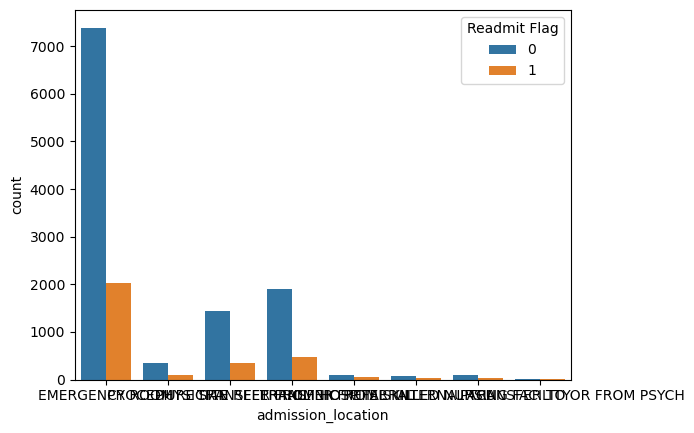

In [333]:
sns.countplot(x = 'admission_location', data=df, hue='Readmit Flag')

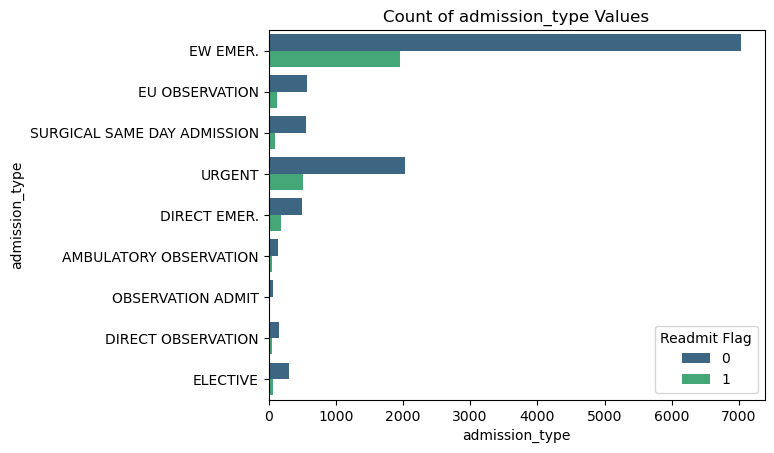

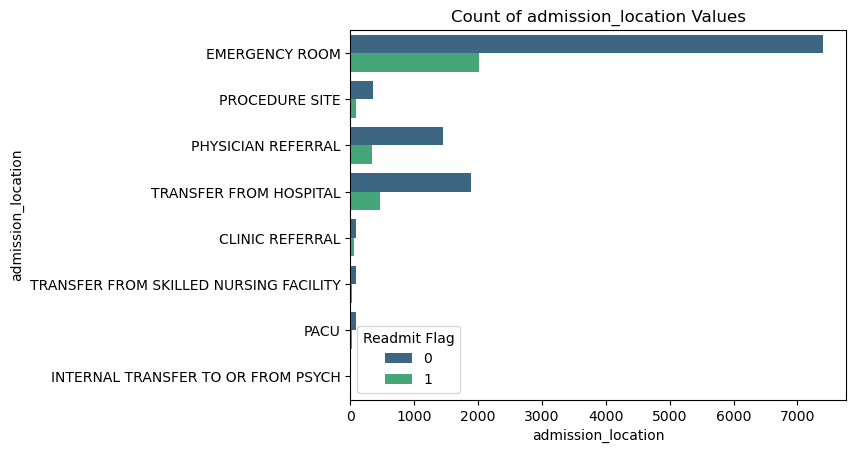

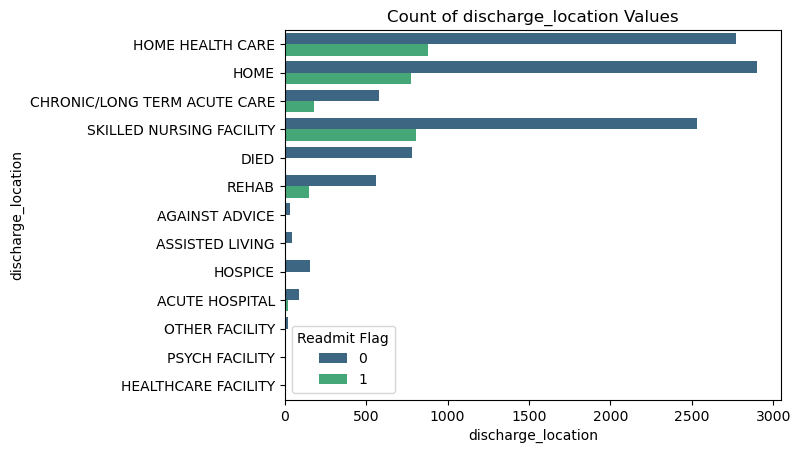

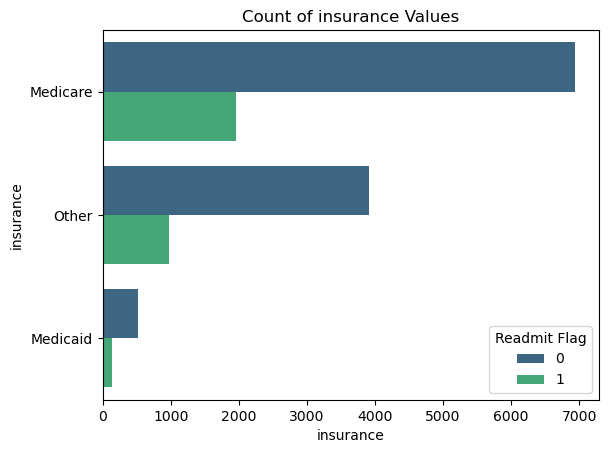

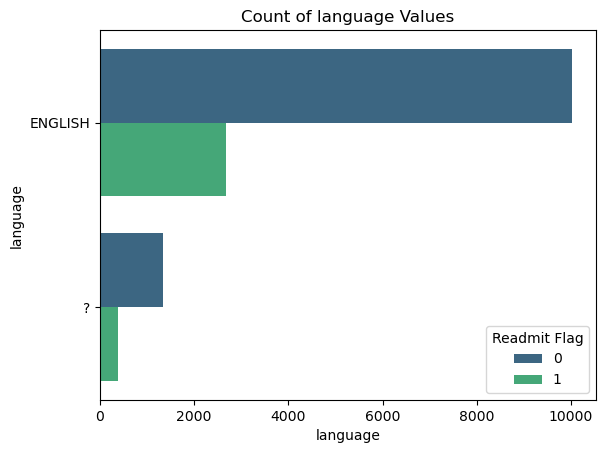

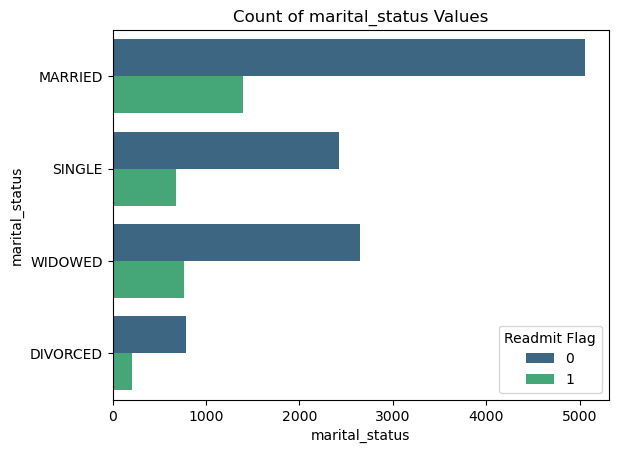

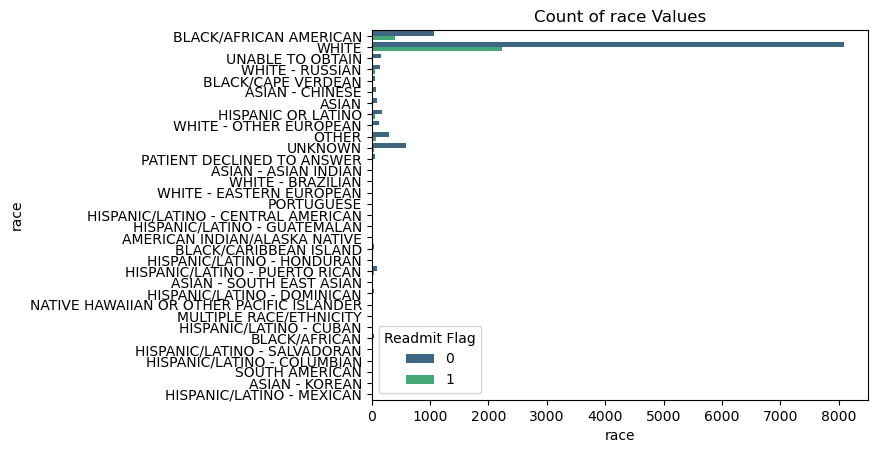

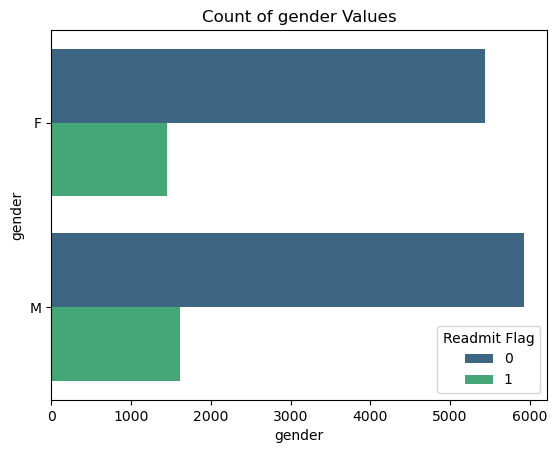

In [334]:
for col in object_col:
    fig = sns.countplot(y=col, data=df, palette = 'viridis', hue='Readmit Flag')
    fig.set_yticklabels(fig.get_yticklabels(), rotation=0)
    plt.xlabel(col)
    plt.title(f'Count of {col} Values')
    plt.show()